In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
df = pd.read_excel("/content/Sample - Superstore.xlsx")

In [5]:
# Define a function to count outliers in a dataset
def count_outliers(data):
    # Calculate the first quartile (25th percentile)
    q1 = np.percentile(data, 25)
    # Calculate the third quartile (75th percentile)
    q3 = np.percentile(data, 75)
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    # Calculate the lower bound for identifying outliers
    lower_bound = q1 - 1.5 * iqr
    # Calculate the upper bound for identifying outliers
    upper_bound = q3 + 1.5 * iqr
    # Count the number of outliers by filtering data outside the bounds
    outlier_count = len([x for x in data if x < lower_bound or x > upper_bound])
    return outlier_count

# Count outliers in the 'Profit', 'Sales', and 'Quantity' columns of the DataFrame 'df'
P_ano = count_outliers(df['Profit'])
S_ano = count_outliers(df['Sales'])
Q_ano = count_outliers(df['Quantity'])

# Print the number of outliers for each column
print("Number of outliers in Profit:", P_ano)
print("Number of outliers in Sales:", S_ano)
print("Number of outliers in Quantity:", Q_ano)


Number of outliers in Profit: 1881
Number of outliers in Sales: 1167
Number of outliers in Quantity: 170


In [6]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df.loc[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
median = df['Sales'].median()
df.loc[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound), 'Sales'] = median



In [7]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df.loc[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]
median = df['Profit'].median()
df.loc[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound), 'Profit'] = median



In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,88.383819,3.789574,0.156203,11.051194
std,2885.163629,32063.693350,107.885487,2.225110,0.206452,16.834794
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-39.637000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,3.210000
50%,4997.500000,56430.500000,54.485000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,105.980000,5.000000,0.200000,15.252300
max,9994.000000,99301.000000,498.260000,14.000000,0.800000,70.722000


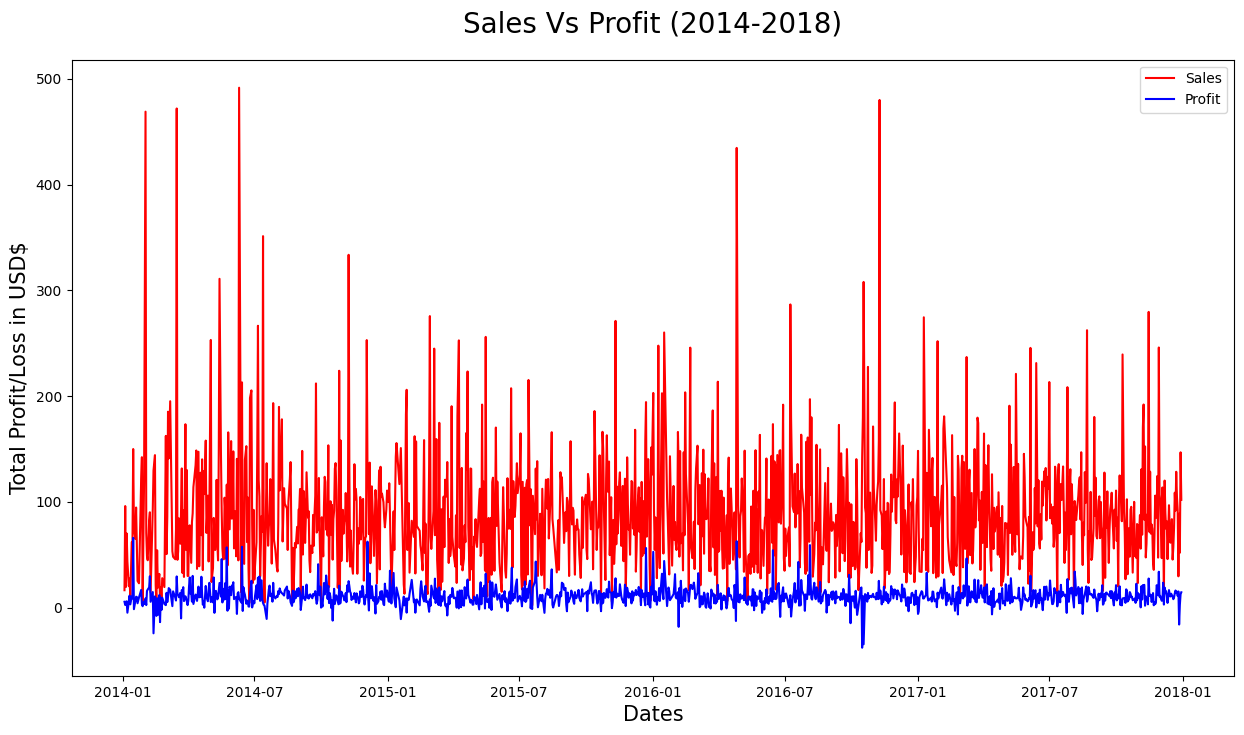

In [9]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)

df_line = df[['Order Date','Sales','Profit','Quantity']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) # Converting into DateTime
df_line = df_line.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[15,8])
plt.ylabel('Total Profit/Loss in USD$',fontsize = 15)
plt.plot(df_line.index, 'Sales', data=df_line, color='red')
plt.plot(df_line.index, 'Profit', data=df_line, color='blue')
plt.title("Sales Vs Profit (2014-2018)", size=20, pad=20)
plt.xlabel("Dates", fontsize = 15)
plt.legend(loc='upper right')


plt.show()

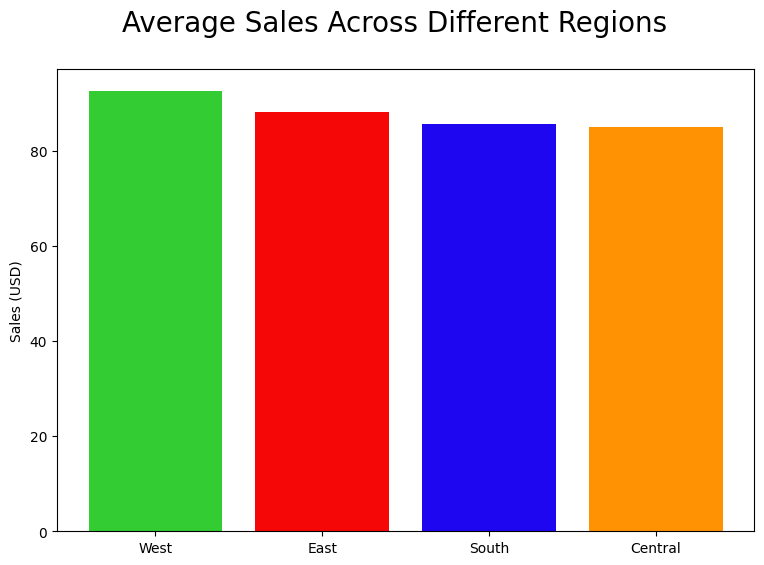

In [11]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_bar = df[['Region','Sales']]

# Grouping the DataFrame based on Regions and taking mean of profit across each of them.
# The reason for sorting is to show the larger values at the beginning (Best Practice)
df_bar = df_bar.groupby('Region').mean().sort_values(by='Sales', ascending=False)

plt.figure(figsize=[9,6]) # Setting the figure size

# Visualizing using Bar Chart
plt.suptitle("Average Sales Across Different Regions", size=20)

# Plotting the BarChart
plt.ylabel("Sales (USD)")

plt.bar(x=df_bar.index, height='Sales', color=['#33cc33','#f50707','#1e07f0','#ff9203'], data=df_bar)
plt.show()

<ipython-input-31-fefc18da1e58>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bar2 = df.groupby("Category").mean().sort_values(by='Sales', ascending=False)


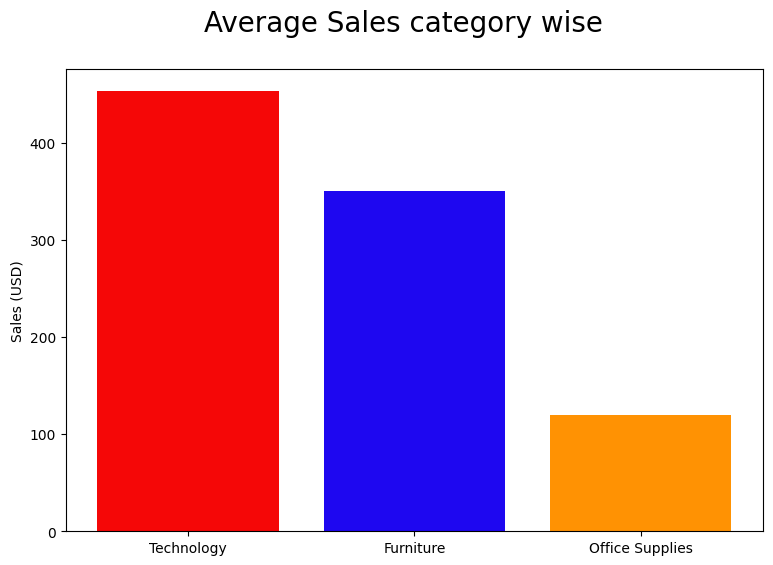

In [31]:
df_bar2 = df.groupby("Category").mean().sort_values(by='Sales', ascending=False)

plt.figure(figsize=[9, 6])
plt.suptitle("Average Sales category wise", size=20)
plt.ylabel("Sales (USD)")

# You can use the 'Sales' column directly for the y-values
plt.bar(x=df_bar2.index, height=df_bar2['Sales'], color=['#f50707', '#1e07f0', '#ff9203'])

plt.show()


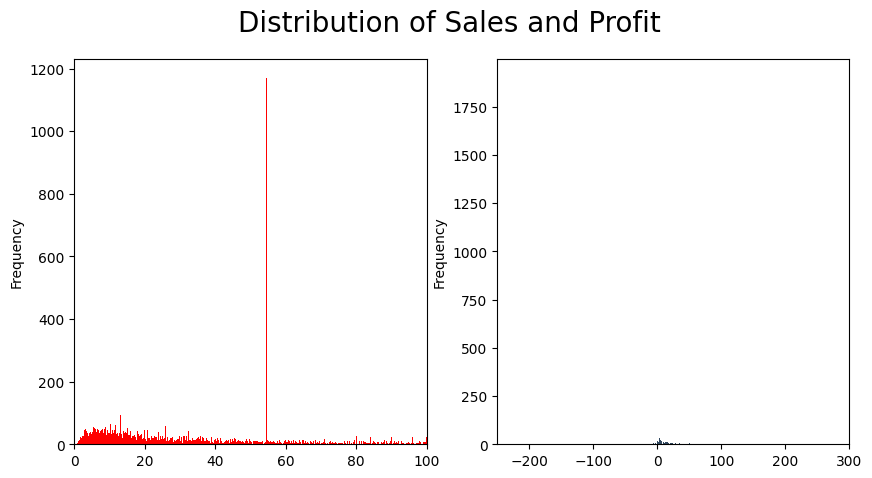

In [13]:
df_dist = df[['Sales','Profit']]
plt.figure(figsize=[10,5])
plt.suptitle("Distribution of Sales and Profit", size=20)
plt.subplot(1,2,1)
plt.ylabel("Frequency")
plt.hist(df_dist['Sales'], bins=2000, color='red')
plt.xlim(0,100)
plt.subplot(1,2,2)
plt.ylabel("Frequency")
plt.xlim(0,100)
plt.hist(df_dist['Profit'], bins=2000, color='#30475E')
plt.xlim(-250,300)
plt.show()


<Axes: ylabel='PROFIT (USD)'>

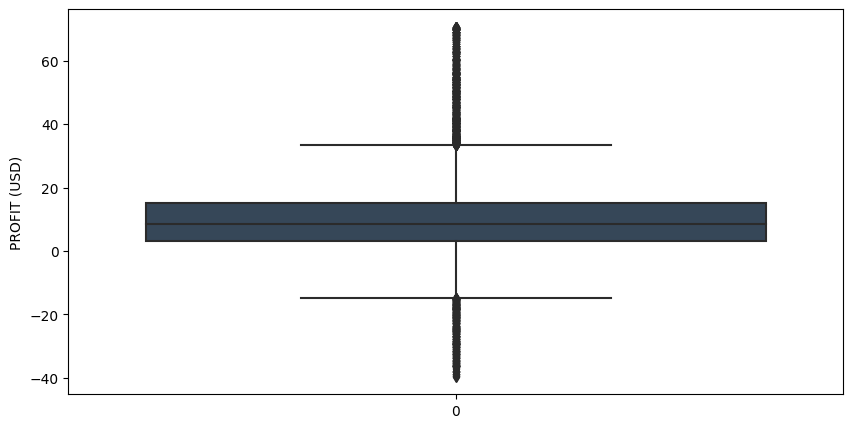

In [14]:
plt.figure(figsize=[10,5])
plt.ylabel("PROFIT (USD)")
sns.boxplot(df_dist['Profit'], color='#30475E')

<Axes: ylabel='SALES (USD)'>

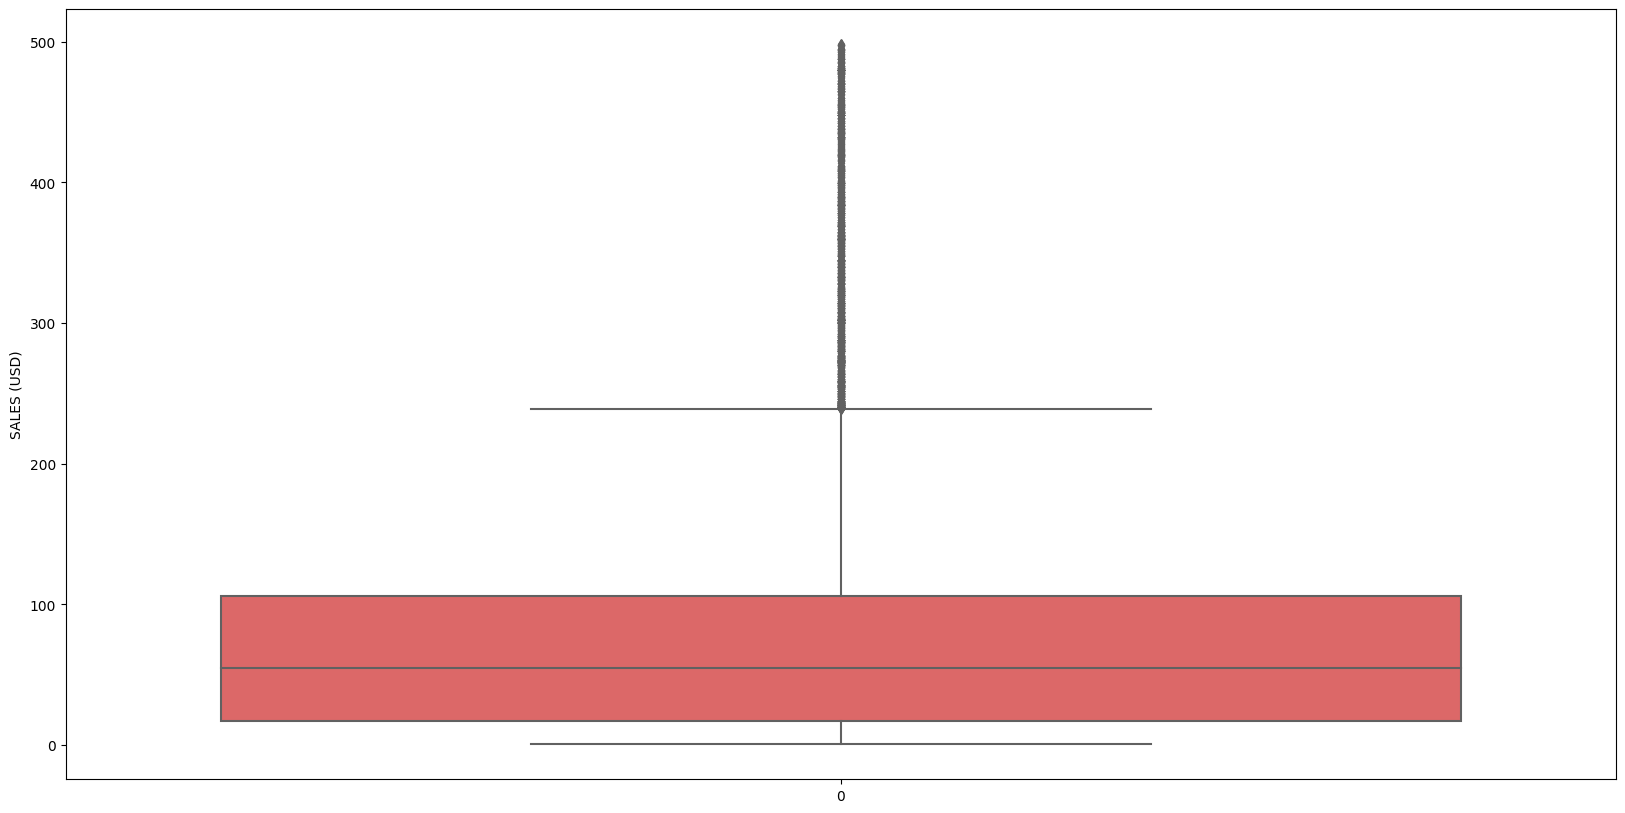

In [15]:
plt.figure(figsize=[20,10])
plt.ylabel("SALES (USD)")
sns.boxplot(df_dist['Sales'], color='#F05454')


<ipython-input-16-0528636a37ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)


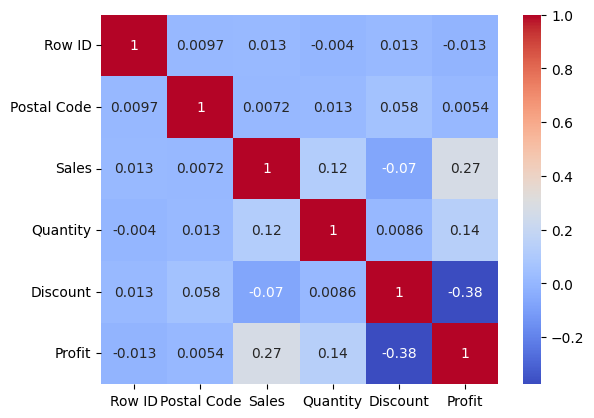

In [16]:

sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()


In [17]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,88.383819,3.789574,0.156203,11.051194
std,2885.163629,32063.693350,107.885487,2.225110,0.206452,16.834794
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-39.637000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,3.210000
50%,4997.500000,56430.500000,54.485000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,105.980000,5.000000,0.200000,15.252300
max,9994.000000,99301.000000,498.260000,14.000000,0.800000,70.722000


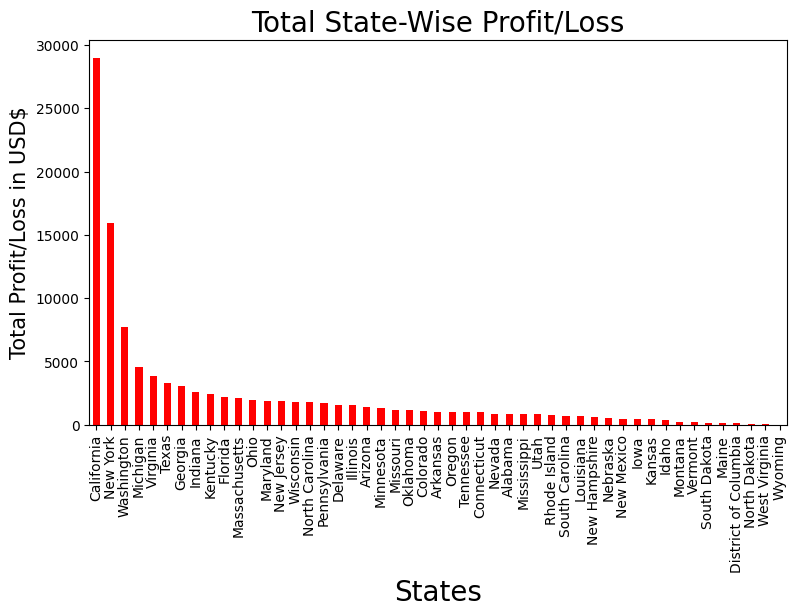

In [18]:
# total Profit for each State
df_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (9, 5),color = 'red')
plt.ylabel('Total Profit/Loss in USD$',fontsize = 15)
plt.xlabel('States',fontsize = 20)
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

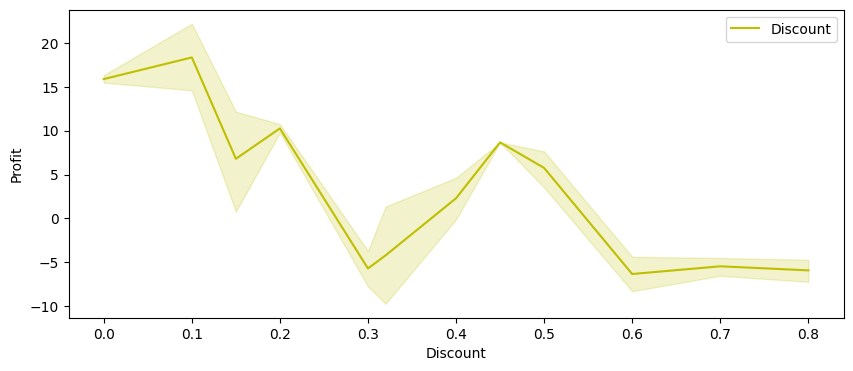

In [19]:
d2d = df[['Discount', 'Profit']]

# Set the figure size for the plot
plt.figure(figsize=(10, 4))

# Create a line plot using Seaborn to visualize the relationship between 'Discount' and 'Profit'
sns.lineplot(x='Discount', y='Profit', data=d2d, color='y', label='Discount')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


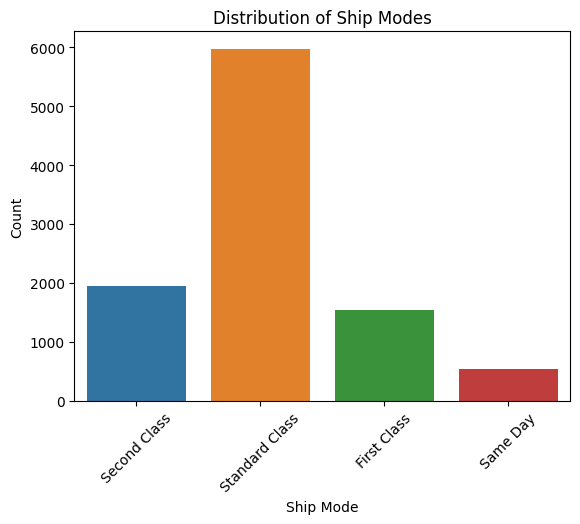

In [20]:
# Create a count plot using Seaborn to visualize the distribution of 'Ship Mode'
sns.countplot(data=df, x='Ship Mode')

# Set labels and title
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Distribution of Ship Modes')

# Rotate x-axis labels if needed for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


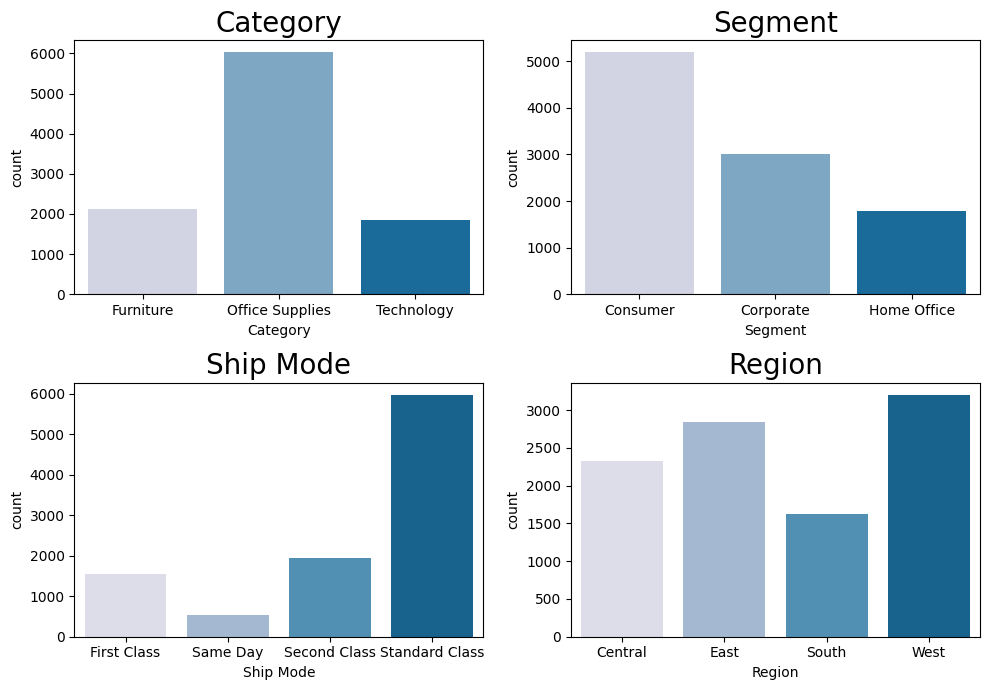

In [22]:
df['Category'] = df['Category'].astype('category')
df['Segment'] = df['Segment'].astype('category')
df['Ship Mode'] = df['Ship Mode'].astype('category')
df['Region'] = df['Region'].astype('category')

# Create a 2x2 grid of subplots with a specified figure size
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# Create count plots for each categorical variable
sns.countplot(data=df, x='Category', ax=axs[0][0], palette='PuBu')
sns.countplot(data=df, x='Segment', ax=axs[0][1], palette='PuBu')
sns.countplot(data=df, x='Ship Mode', ax=axs[1][0], palette='PuBu')
sns.countplot(data=df, x='Region', ax=axs[1][1], palette='PuBu')

# Set titles for each subplot
axs[0][0].set_title('Category', fontsize=20)
axs[0][1].set_title('Segment', fontsize=20)
axs[1][0].set_title('Ship Mode', fontsize=20)
axs[1][1].set_title('Region', fontsize=20)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


<Axes: >

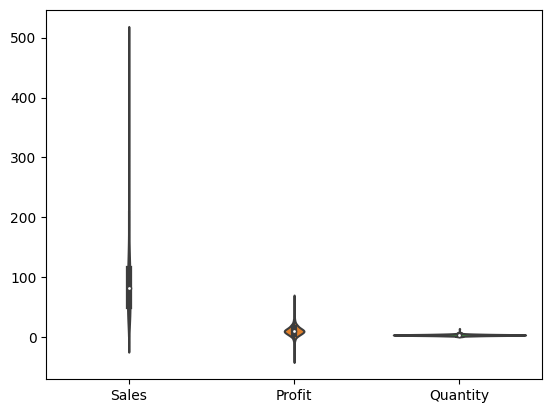

In [23]:
sns.violinplot(data=df_line)

<Axes: xlabel='Profit', ylabel='Sales'>

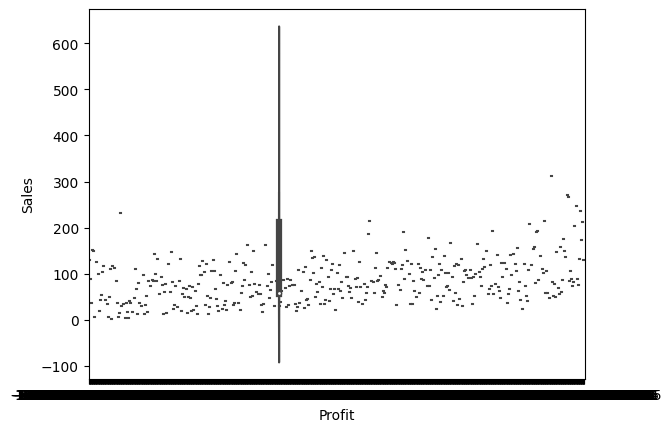

In [24]:
sns.violinplot(x="Profit", y="Sales", data=df_line)

Text(0.5, 1.0, 'Composition of Sub-Category for Sales')

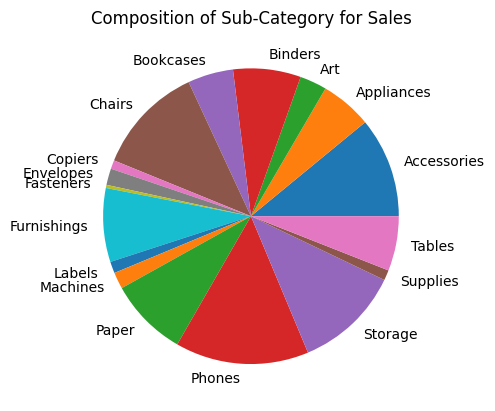

In [25]:
df_pie = df[['Sub-Category','Sales','Profit']]
# taking a groupby on category and then ship mode...
df_pie = df_pie.groupby(['Sub-Category']).sum().reset_index()

plt.pie(df_pie['Sales'], labels=df_pie['Sub-Category'])
plt.title("Composition of Sub-Category for Sales")

Theta_0: 69.33310570503286
Theta_1: 1.7238601153196813


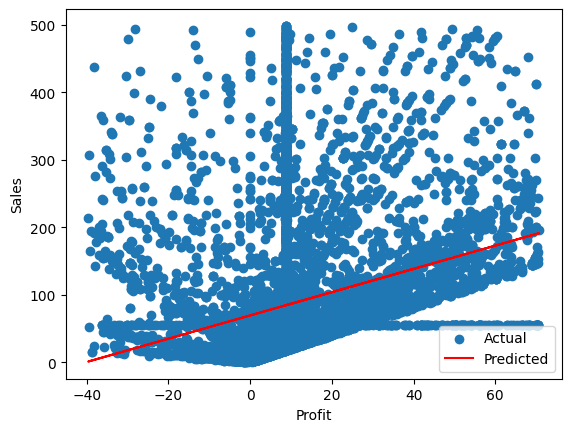

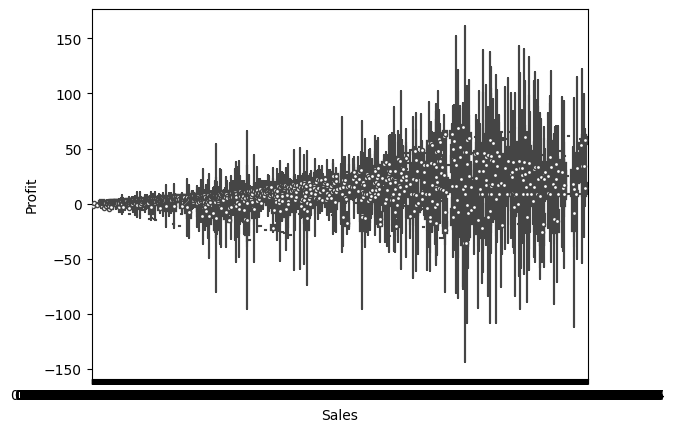

In [27]:
# Extract input and output variables
input = df['Profit']
output = df['Sales']

def compute_weights(input, output):
    mean_x = np.mean(input)
    mean_y = np.mean(output)

    # Compute theta_1
    theta_1 = np.sum((input - mean_x) * (output - mean_y)) / np.sum((input - mean_x) ** 2)

    # Compute theta_0
    theta_0 = mean_y - theta_1 * mean_x
    return theta_0, theta_1

# Compute the coefficients (theta_0 and theta_1)
theta_0, theta_1 = compute_weights(input, output)
print("Theta_0:", theta_0)
print("Theta_1:", theta_1)

# Generate predicted values
y_hat = theta_0 + input * theta_1

# Scatter plot and regression line
plt.scatter(input, output)
plt.plot(input, y_hat, color='red')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.legend(['Actual', 'Predicted'])
plt.show()

# Violin plot using Seaborn
sns.violinplot(x="Sales", y="Profit", data=df)
plt.show()


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [29]:
df=pd.read_excel("/content/Sample - Superstore.xlsx")

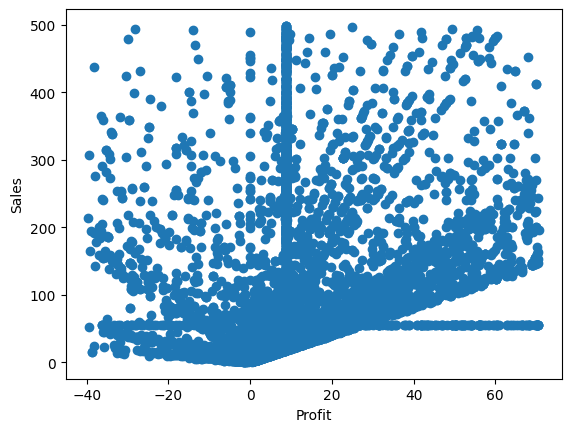

In [28]:
%matplotlib inline
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.scatter(df.Profit,df.Sales)